In [3]:
%matplotlib inline

import os
import socket
import sys

if socket.gethostname() == "qiaubuntu" or socket.gethostname() == "toologic-ubuntu2":
    repo_path = os.path.expanduser('~/repository/model_evaluation')
else:
    repo_path = os.path.expanduser('~/repo/model_evaluation')
sys.path.extend([repo_path])

import matplotlib.pyplot as plt
from matplotlib import rc

import SimpleITK as sitk
import numpy as np
from glob import iglob

from utils.medpy_metrics import hd, dc
from tqdm import tqdm

In [4]:
import numpy as np
from scipy.ndimage import measurements   

def getLargestCC(segmentation):
    labels, count = measurements.label(segmentation, structure=np.ones((3,3,3)))
    assert( labels.max() != 0 ) # assume at least 1 CC
    largestCC = labels == np.argmax(np.bincount(labels.flat)[1:])+ 1
    return largestCC


In [6]:
result_dir = '/home/bob/CardiacMRStrain/output/seg/CE_drn_upsmp/'
hds = list()
dcs = list()


for fname in tqdm(iglob('/home/bob/CardiacMRStrain/output/seg/reference/*_ES.nii.gz')):
    img = sitk.ReadImage(fname)
    spacing = img.GetSpacing()[::-1]
    reference = sitk.GetArrayFromImage(img)
    
#     select = np.where(np.any(reference, (1,2)))[0]
#     img = img[select[0]:select[-1]+1]
#     reference = reference[select[0]:select[-1]+1]
    
    
    res_fname = os.path.join(result_dir, os.path.basename(fname))
    img = sitk.ReadImage(res_fname)
    prediction = sitk.GetArrayFromImage(img)
    if reference.shape != prediction.shape:
        continue
    
    hds.append([hd(getLargestCC(prediction==lab), getLargestCC(reference==lab), spacing) for lab in range(1,4)])
    dcs.append([dc(getLargestCC(prediction==lab), getLargestCC(reference==lab)) for lab in range(1,4)])
    
print(np.mean(dcs, 0))
print(np.mean(hds, 0))
#rv
#lvm
#lvb

25it [00:08,  2.83it/s]

[0.87767622 0.87460835 0.90205842]
[13.51609928  8.8631213   8.72806462]


In [8]:
print(np.mean(dcs, 0))
print(np.mean(hds, 0))

[0.9269934  0.85298104 0.95040341]
[11.74775646  7.89036707  6.02732913]


In [105]:
print(np.mean(dcs, 0))
print(np.mean(hds, 0))

[0.93443415 0.88088283 0.96242679]
[12.92013935  7.92302053  4.94505519]


(0, 1)

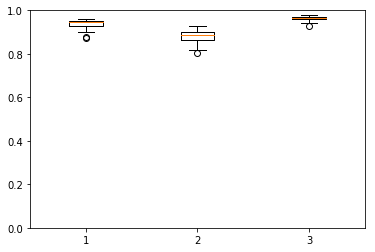

In [106]:

plt.boxplot(np.array(dcs));
plt.ylim(0, 1)